In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(0)
%matplotlib inline

In [2]:
def load_data_from_file(fileName='./data/advertising.csv'):
    data = np.genfromtxt(fileName, dtype=None, delimiter=',', skip_header=1)
    features_X = data[:, :3]
    sales_Y = data[:, 3]
    features_X = np.hstack((np.ones((features_X.shape[0], 1)), features_X))
    return features_X, sales_Y

In [3]:
features_X, _ = load_data_from_file()
print(features_X[:5, :])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [4]:
_, sales_Y = load_data_from_file()
print(sales_Y.shape)

(200,)


In [5]:
# Bài tập 2
def create_individual(n=4, bound=10):
    individual = []

    for _ in range(4):
        individual.append(np.random.uniform(-bound/2, bound/2))
    return individual

In [6]:
create_individual()

[0.7665121794875596,
 1.0766092093936628,
 4.499811748338473,
 -0.07501322595357074]

In [7]:
# Bài tập 3
features_X, sales_Y = load_data_from_file()

def compute_loss(individual):
    theta = np.array(individual)
    y_hat = features_X.dot(theta)
    loss = np.multiply((y_hat - sales_Y), (y_hat - sales_Y)).mean()
    return loss

def compute_fitness(individual):
    loss = compute_loss(individual)
    fitness_value = 0
    fitness_value = 1/(loss + 1)
    return fitness_value

In [8]:
features_X, sales_Y = load_data_from_file()
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0185991537088997e-06


In [9]:
# Bài tập 4: kỹ thuật thực hiện crossover giữa 2 chromosomes
def crossover(individual1, individual2, crossover_rate=0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()

    for i in range(len(individual1)):
        random_value = np.random.rand()
        if random_value < crossover_rate: 
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]
    return individual1_new, individual2_new

In [10]:
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]

individual1, individual2 = crossover(individual1, individual2, 2.0)
print('individual1: ', individual1)
print('individual2: ', individual2)

individual1:  [3.44, 2.57, -0.79, -2.41]
individual2:  [4.09, 4.82, 3.1, 4.02]


In [11]:
# Bài 5: kỹ thuật mutation với chromosome
def mutate(individual, mutation_rate=0.05):
    individual_m = individual.copy()
    for i in range(len(individual)):
        random_value = np.random.rand()
        if random_value < mutation_rate: 
            individual_m[i] = 1 - individual[i]
    return individual_m

In [12]:
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(before_individual, mutation_rate=2.0)
print(before_individual == after_individual)

False


In [13]:
# Bài tập 6: khởi tạo population đầu tiên
def initialize_population(m):
    population = [create_individual() for _ in range(m)]
    return population

In [14]:
# population = initialize_population(100)
# print(len(population))

In [15]:
# Bài tập 7: kỹ thuật selection để thực hiện việc chọn lọc tự nhiên, 
#               đào thải những cá thể yếu trong population
def selection(sorted_old_population, m=100):
    index1 = random.randint(0, m-1)
    while True: 
        index2 = random.randint(0, m-1)
        if (index2 != index1): 
            break
    
    individual_s = sorted_old_population[index1]
    if index2 > index1: 
        individual_s = sorted_old_population[index2]
    
    return individual_s

In [16]:
# population = initialize_population(100)
# individual_s = selection(population, m=100)
# print(individual_s)

In [17]:
# Bài 8: kỹ thuật tạo ra quần thể mới
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness)
    
    if gen%1 == 0:
        print('Best loss:', compute_loss(sorted_population[m-1]),
              'with chromosome: ', sorted_population[m-1])
    
    new_population = []
    while len(new_population) < m-elitism: 
        # selection
        individual_s1 = selection(sorted_population, m)
        individual_s2 = selection(sorted_population, m)

        # crossover
        individual_c1, individual_c2 = crossover(individual_s1, individual_s2)

        # mutation
        individual_m1 = mutate(individual_c1)
        individual_m2 = mutate(individual_c2)
        new_population.append(individual_m1)
        new_population.append(individual_m2)

    # copy elitism chromosomes that have best fitness score 
    # to the next generation for ind in sorted_population[m-elitism:]:
    new_population.extend(sorted_population[m-elitism:])
    return new_population, compute_loss(sorted_population[m-1])


In [18]:
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [individual1, individual2]
new_population, _ = create_new_population(old_population, elitism=2, gen=1)

Best loss: 123415.051528805 with chromosome:  [3.44, 2.57, -0.79, -2.41]


In [19]:
# Bài 9:
def run_GA():
    n_generations = 100
    m = 600
    features_X, sales_Y = load_data_from_file()
    population = initialize_population(m)
    losses_list = []
    for i in range(n_generations):
        population, losses = create_new_population(population)
        losses_list.append(losses)
    return losses_list, population

Best loss: 899.7107796286884 with chromosome:  [-3.4350880229740985, -0.1372897436833842, 0.7395171683962518, -0.07024977871359006]
Best loss: 899.7107796286884 with chromosome:  [-3.4350880229740985, -0.1372897436833842, 0.7395171683962518, -0.07024977871359006]
Best loss: 899.7107796286884 with chromosome:  [-3.4350880229740985, -0.1372897436833842, 0.7395171683962518, -0.07024977871359006]
Best loss: 648.7780565630769 with chromosome:  [-2.0807843322872897, -0.03260816506835962, 0.6918847999457416, 0.6832413866576559]
Best loss: 588.678093699311 with chromosome:  [4.4350880229740985, -0.1372897436833842, 0.7395171683962518, -0.07024977871359006]
Best loss: 248.32321588148494 with chromosome:  [5.851288283122788, 0.020680787322095107, -0.513276337326042, 0.1791661156715154]
Best loss: 177.2377403461529 with chromosome:  [-2.4801199459922163, 0.020680787322095107, 0.7034093629551856, 0.1791661156715154]
Best loss: 29.893836594793036 with chromosome:  [4.4350880229740985, 0.02068078732

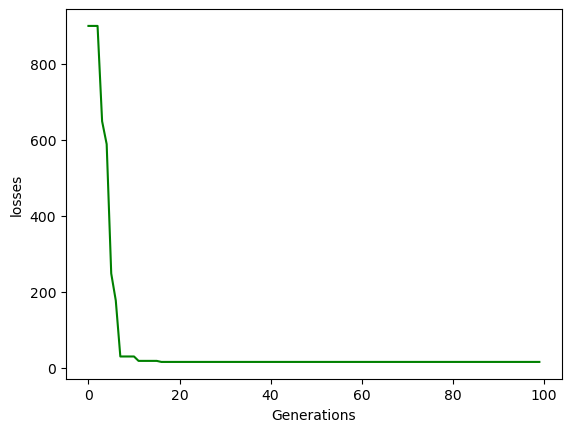

In [23]:
# Bài tập 10: Trực quan hóa loss values
import matplotlib.pyplot as plt

def visualize_loss(losses_list):
    plt.plot(losses_list, color='green')
    plt.xlabel('Generations')
    plt.ylabel('losses')
    plt.show()

losses_list, population = run_GA()
visualize_loss(losses_list)

[5.403059134575349, 0.048255233619061144, 0.0699430349093344, 0.04285267339724452]


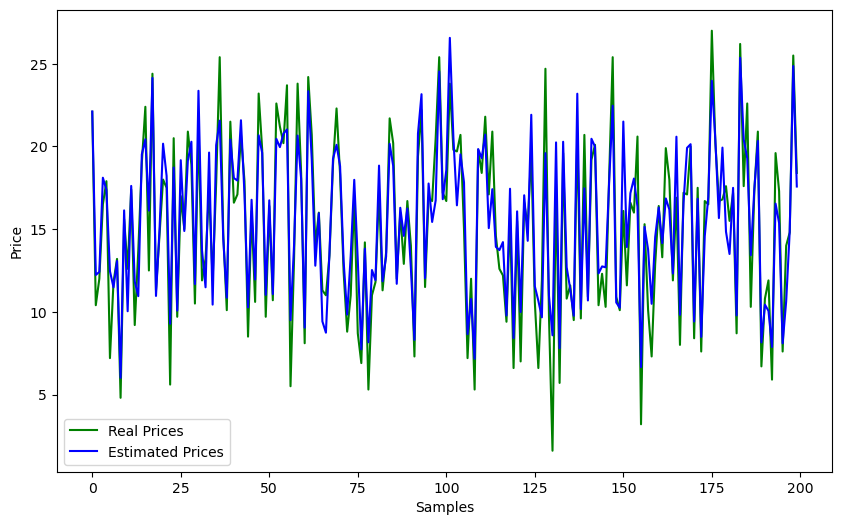

In [21]:
# Bài 11: Trực quan hóa kết quả dự đoán sales và giá trị thực tế
def visualize_predict_gt():
    # visualization of ground truth and predict value
    sorted_population = sorted(population, key=compute_fitness)
    print(sorted_population[-1])
    theta = np.array(sorted_population[-1])

    estimated_prices = []
    for feature in features_X:
        estimated_price = feature.dot(theta)
        estimated_prices.append(estimated_price)
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.xlabel('Samples')
    plt.ylabel('Price')
    plt.plot(sales_Y, c='green', label='Real Prices')
    plt.plot(estimated_prices, c='blue', label='Estimated Prices')
    plt.legend()
    plt.show()

visualize_predict_gt()